In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from pylab import rcParams
%pylab inline
%matplotlib inline
rcParams['figure.figsize'] = 12, 6
from datetime import datetime
import re
import math
from sklearn.metrics import make_scorer
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = pd.read_csv('tmp/scaled_features.csv', usecols=['Sales', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Promo2', 'DateYear', 'DateMonth', 'DateDay'])
d = d[d.Store == -1.73167440912]
d = d.sort(columns=['DateYear', 'DateMonth', 'DateDay'])
d['Date'] = pd.date_range(start='2013-01-01', end='2015-09-17', freq='D')
print d.Date[:5]
print d.Date[-5:]

1016095   2013-01-01
1014980   2013-01-02
1013865   2013-01-03
1012750   2013-01-04
1011635   2013-01-05
Name: Date, dtype: datetime64[ns]
1020633   2015-09-13
1019777   2015-09-14
1018921   2015-09-15
1018065   2015-09-16
1017209   2015-09-17
Name: Date, dtype: datetime64[ns]


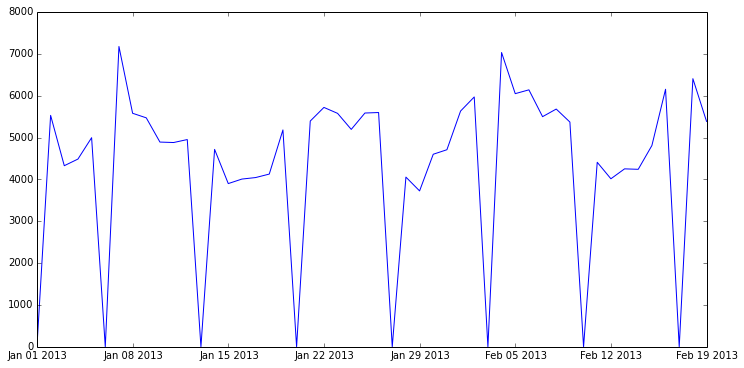

In [3]:
_ = plt.plot(d['Date'][:50], d['Sales'][:50])

In [4]:
d.index = d.Date
d = d[d.Sales >= 0]
e = d['Sales']
f = d[['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Promo2']]

In [5]:
etr = e[:'2015-07-01']
ete = e['2015-07-01':]
ftr = f[:'2015-07-01']
fte = f['2015-07-01':]

In [6]:
#_ = sm.graphics.tsa.plot_acf(e.values.squeeze(), lags=800)
#_ = sm.graphics.tsa.plot_pacf(e.values, lags=800)

In [7]:
#arma_mod = sm.tsa.ARMA(endog=etr, order=(14,0), freq='D', exog=ftr).fit(solver='nm', tol=1, method='css')
arma_mod = sm.tsa.ARMA(endog=etr, order=(25,0), freq='D').fit(solver='nm', tol=1, method='css')

/Library/Python/2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [8]:
#print(arma_mod.params)
#print(arma_mod.aic, arma_mod.bic, arma_mod.hqic)
#sm.stats.durbin_watson(arma_mod.resid.values)
#_ = plt.plot(arma_mod.resid)
#resid = arma_mod.resid
#stats.normaltest(resid)
#_ = qqplot(resid, line='q', fit=True)
#_ = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=800)
#_ = sm.graphics.tsa.plot_pacf(resid, lags=800)

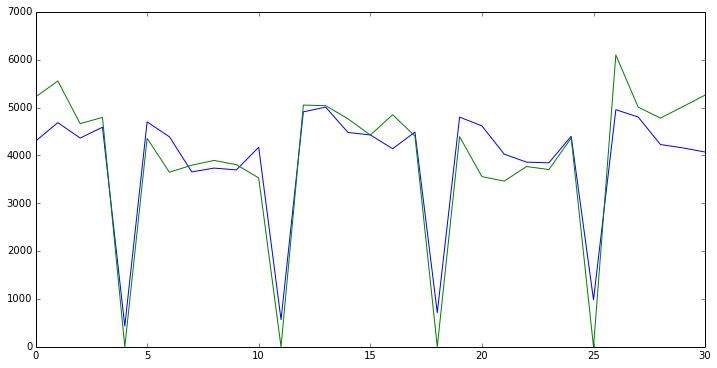

In [9]:
#preds = arma_mod.predict(start='2015-07-02', end='2015-07-31', exog=fte, dynamic=False)
preds = arma_mod.predict(start='2015-07-01', end='2015-07-31', dynamic=False)
#print preds[:5]
#print ete[:5]
_ = plt.plot(preds)
_ = plt.plot(ete)

In [10]:
def rmspe_func(y_true, y_pred, **kwargs):
    if len(y_pred) != len(y_true):
        raise Exception("different length series passed to scorer function")
    d = DataFrame({'yt': y_true, 'yp': y_pred})
    d = d[d.yt != 0]
    return np.sqrt((1.0/len(d.yt))*(np.square(((d.yt - d.yp)/d.yt)).sum()))
rmspe_func(ete, preds)

0.12611546174042659